<a href="https://colab.research.google.com/github/chaerui7967/Today_I_Learned/blob/master/korean_font_on_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colaboratory Matplotlib 에서 한글폰트 사용하기
## 참고
- 링크: https://programmers.co.kr/learn/courses/21/lessons/950
- 총 3가지 방법 중에서 실제 사용할만하다 싶은 하나만 해봄

In [ ]:
# 일단 import 
%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도


# 한글 깨지는 것 확인하기

In [ ]:
# 데이터 준비
import numpy as np

data = np.random.randint(-200, 100, 50).cumsum()
data

array([  -32,    65,    33,   -53,  -215,  -211,  -149,  -313,  -451,
        -430,  -388,  -430,  -568,  -666,  -583,  -721,  -739,  -829,
        -759,  -876,  -832,  -780,  -849,  -979, -1064, -1021,  -944,
       -1009,  -966, -1129, -1108, -1267, -1248, -1151, -1286, -1251,
       -1434, -1438, -1634, -1657, -1682, -1831, -1831, -1949, -2019,
       -2111, -2277, -2304, -2210, -2185])

Text(0.5,0,'시간(분)')

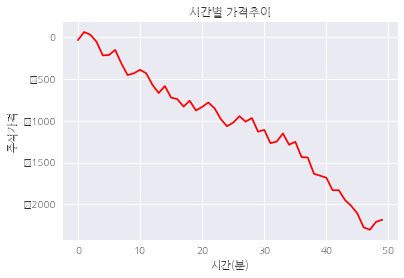

In [ ]:
# 한글을 넣어놓고 그러보면 깨진다
plt.figure(figsize=(10,8))
plt.plot(range(50), data, 'r')
plt.title('시간별 가격추이')
plt.ylabel('주식가격')
plt.xlabel('시간(분)')

# 버전과 위치정보를 알아두자
- 이후 필요하게 될 수 있다. 

In [ ]:
print(mpl.__version__)
print(mpl.__file__)
print(mpl.get_configdir())
print(mpl.get_cachedir())

2.1.2
/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py
/content/.config/matplotlib
/content/.cache/matplotlib


# 시스템에 설치된 폰트 확인. 나눔은 없다

In [ ]:
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 65
['/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumPen.ttf', '/usr/share/fonts/truetype/ttf-liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/ttf-liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf', '/usr/share/fonts/truetype/ttf-liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf', '/usr/share/fonts/truetype/ttf-liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.

# 나눔고딕 인스톨

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
# 체크해보면 폰트 개수가 늘어났다
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 65
nanum_font number: 27


## 설치된 나눔 폰트의 전체 경로를 보자
- 이걸로  나중에 세팅을 하게 된다.

In [ ]:
# 한번 프린트 해보자
nanum_font

['/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/truet

In [ ]:
# 현재 설정되어 있는 폰트 사이즈와 글꼴을 알아보자
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

Python 3.6.3
설정 폰트 글꼴: ['NanumGothic Eco'], 설정 폰트 사이즈: 10.0


# 나눔글꼴을 깔았으니 한번 설정해보자. 
- 그런데 안될거다

In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothic Eco


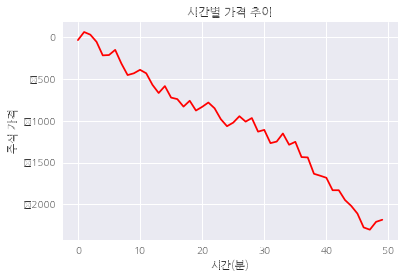

In [ ]:
# 그래프를 그려보자. 하지만 한글은 깨진다
plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')
plt.style.use('seaborn-pastel')
plt.show()

## 정답은 fm._rebuild()

fm._rebuild() 를 해줘야 system 에 추가 설치된 폰트를 matplotilb.font_manager 가 알아차리는 것으로 보인다. 

In [ ]:
# 우선 fm._rebuild() 를 해주고
fm._rebuild()

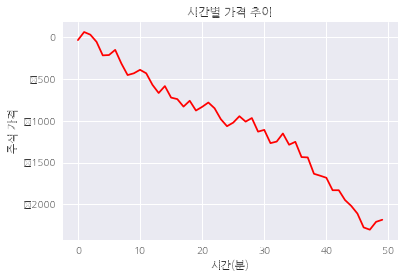

In [ ]:
# 다시 그려보자
plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')
plt.style.use('seaborn-pastel')
plt.show()

## 앗~ 왜 마이너스 기호가 깨지지? 
mpl.rcParams['axes.unicode_minus'] = False 를 해줘야 한다


In [ ]:
mpl.rcParams['axes.unicode_minus'] = False

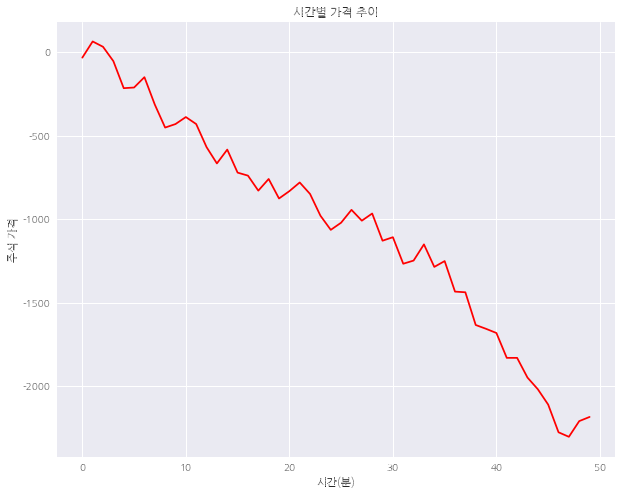

In [ ]:
# 다시 한번 그래프를 그려줘보자. 이번엔 마이너스 기호가 잘 나올것이다.
plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')
plt.style.use('seaborn-pastel')
plt.show()